In [199]:
""" 
Focus on just a single task. For debugging, can extract chunks and best-fit perms, then
visualize.
Useful to focus on one task so can iterate over many dataset etc.

DONE: fixed problem 
"""


' \nFocus on just a single task. For debugging, can extract chunks and best-fit perms, then\nvisualize.\nUseful to focus on one task so can iterate over many dataset etc.\n\nDONE: fixed problem \n'

In [163]:
from pythonlib.behmodel.score_dataset import score_dataset
# from pythonlib.behmodel.scorer.prior_functions import prior_feature_extractor
from pythonlib.behmodel.scorer.likeli_functions import likeli_dataset
from pythonlib.behmodel.scorer.poster_functions import poster_dataset
from pythonlib.behmodel.behmodel import BehModel
from pythonlib.behmodel.scorer.scorer import Scorer
from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.analy_dlist import concatDatasets
from pythonlib.dataset.analy import preprocessDat
import numpy as np
import matplotlib.pyplot as plt
from pythonlib.dataset.beh_model_comparison import plots_cross_prior_and_model_combined, ColNames
from pythonlib.behmodel.behmodel_handler import cross_dataset_model_wrapper_params
from pythonlib.behmodel.behmodel_handler import cross_dataset_model_wrapper, bmh_optimize_single, bmh_results_to_dataset, cross_dataset_model_wrapper_params, bmh_save, bmh_load
from pythonlib.dataset.analy import extract_strokes_monkey_vs_self


In [184]:
# Load datasets
SDIR = "/data2/analyses/main/model_comp/planner"

SUBSAMPLE = False

animal = "Pancho"
expt = "gridlinecircle"
rule_list = ["baseline"]

LOAD_ALL_PARSES = False
ONLY_SUMMARY_DATES = False
EXTRACT_BEH_ALIGNED_PARSES = False
FIXED = True

# LOAD ALL DATASETS
Dlist  = []
for rule in rule_list:
    D = Dataset([])
    D.load_dataset_helper(animal, expt, rule=rule)
    
    if SUBSAMPLE:
        if FIXED:
            D.subsampleTrials(1,2)
        else:
            D.subsampleTrials(10, 2)
        
    D.load_tasks_helper()
    
    if FIXED:
        D.filterPandas({"random_task":[False], "insummarydates":[ONLY_SUMMARY_DATES]}, "modify")
    else:
        D.filterPandas({"insummarydates":[ONLY_SUMMARY_DATES]}, "modify")
    
    if expt in ["lines5"]:
        pathbase = None
        name_ver = "trialcode"
        if LOAD_ALL_PARSES:
            list_parse_params = [
                {"quick":True, "ver":"graphmod", "savenote":f"fixed_{FIXED}"},
                {"quick":True, "ver":"nographmod", "savenote":f"fixed_{FIXED}"}]
            list_suffixes = ["graphmod", "nographmod"] # the name in dataset
        else:
            list_parse_params = [
                {"quick":True, "ver":"graphmod", "savenote":f"fixed_{FIXED}"}]
            list_suffixes = ["graphmod"]
    elif expt in ["gridlinecircle"]:
        pathbase = f"/data2/analyses/database/PARSES_GENERAL/{expt}"
        name_ver = "unique_task_name"
        if LOAD_ALL_PARSES:
            list_parse_params = [
                {"quick":True, "ver":"graphmod", "savenote":""},
                {"quick":True, "ver":"nographmod", "savenote":""}]
            list_suffixes = ["graphmod", "nographmod"] # the name in dataset
        else:
            list_parse_params = [
                {"quick":True, "ver":"graphmod", "savenote":""}]
            list_suffixes = ["graphmod"]
    else:
        assert False
    
        
    D.parser_load_presaved_parses(list_parse_params, list_suffixes, pathbase=pathbase, name_ver=name_ver,
                                 ensure_extracted_beh_aligned_parses=EXTRACT_BEH_ALIGNED_PARSES)
    Dlist.append(D)
        
# Preprocess
D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(Dlist[0], expt)


Searching using this string:
/data2/analyses/database//*Pancho*gridlinecircle*baseline*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/data2/analyses/database/BEH/*Pancho*gridlinecircle*baseline*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/BEH/Pancho-gridlinecircle-baseline-210824_002447
----------------
Currently loading: /data2/analyses/database/BEH/Pancho-gridlinecircle-baseline-210824_002447
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210820, 'edate': 210821, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210820': 1, '210821': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['gridlinecircle1', 'gridlinecircle2'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt': 'gridlinecircle', 'task_train_test':

TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check out of bounds
TODO: check 

In [189]:
# Pick a single task to focus on . Will filter data, and will affect subsequent plotting and extraction
taskname = "mixture2-ss-5_1-064566"
D = D.filterPandas({"unique_task_name":[taskname]}, "dataset")

In [190]:
# Loading P directly [OPTIONAL, if not using D]
if False:
    path = f"/data2/analyses/database/PARSES_GENERAL/gridlinecircle/ver_graphmod-quick_True/{taskname}-behalignedperms.pkl"
    import pickle
    with open(path, "rb") as f:
        P = pickle.load(f)


    for p in P.Parses:
        print(p["permutation_of"])
        print(p["perm_of_list"])
        print(p["bestperm_beh_list"])


    for i, p in enumerate(P.ParsesBase):
        print(i, p["rule"], P.findparses_bycommand("permutation_of_v2", {"parsekind": "base", "ind":i}))


None
[('base', 0)]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[]
None
[]
[('Pancho', 'gridlinecircle', 'baseline', '210821-1-203')]
None
[]
[]
0
[('base', 0), ('base', 1)]
[]
0
[('base', 0), ('base', 3)]
[]
0
[('base', 0)]
[]
0
[('base', 0), ('base', 2)]
[]
0
[('base', 0)]
[]
0
[('base', 0), ('base', 2)]
[]
0
[('base', 0)]
[]
0
[('base', 0)]
[]
0
[('base', 0)]
[]
0
[('base', 0)]
[]
0
[('base', 0), ('base', 3)]
[]
0
[('base', 0), ('base', 3)]
[]
0
[('base', 0)]
[]
0
[('base', 0)]
[]
0
[('base', 0)]
[]
0
[('base', 0), ('base', 3)]
[]
0
[('base', 0)]
[]
0
[('base', 0), ('base', 1)]
[]
0
[('base', 0), ('base', 3)]
[]
0
[('base', 0), ('base', 1)]
[]
0
[('base', 0), ('base', 2)]
[]
0
[('base', 0)]
[]
1
[]
[]
1
[]
[('Pancho', 'gridlinecircle', 'baseline', '210821-1-203')]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
1
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[]
[]
2
[

KeyError: 'permutation_of'

##### Print and plot things

In [198]:
from pythonlib.dataset.dataset_analy.parses import plot_baseparses_all, plot_and_print_perms_for_each_baseparse, print_summary_bestparses_alltrials, print_summary_all_bestfits_each_baseparse

print_summary_all_bestfits_each_baseparse(D, indtrial)

--- baseparse  0 baseline
done_permutations: True
('Pancho', 'gridlinecircle', 'baseline', '210821-1-203') permnum:  171
('Pancho', 'gridlinecircle', 'baseline', '210821-1-223') permnum:  177
('Pancho', 'gridlinecircle', 'baseline', '210821-1-321') permnum:  177
('Pancho', 'gridlinecircle', 'baseline', '210821-1-389') permnum:  218
('Pancho', 'gridlinecircle', 'baseline', '210821-1-462') permnum:  178
('Pancho', 'gridlinecircle', 'circletoline', '210827-1-237') permnum:  217
('Pancho', 'gridlinecircle', 'circletoline', '210827-1-410') permnum:  202
('Pancho', 'gridlinecircle', 'circletoline', '210827-1-423') permnum:  237
('Pancho', 'gridlinecircle', 'circletoline', '210827-1-585') permnum:  16
('Pancho', 'gridlinecircle', 'circletoline', '210827-1-672') permnum:  217
('Pancho', 'gridlinecircle', 'linetocircle', '210823-1-187') permnum:  180
('Pancho', 'gridlinecircle', 'linetocircle', '210823-1-217') permnum:  180
('Pancho', 'gridlinecircle', 'linetocircle', '210823-1-257') permnum:  

[0, 1, 2, 3, 4]
--- 0 ('Pancho', 'gridlinecircle', 'baseline', '210821-1-203')
parses: [0] num bestperms 1 [171] rule_baseline --
parses: [1] num bestperms 1 [30] rule_linetocircle --
parses: [2] num bestperms 1 [31] rule_circletoline --
parses: [3, 4, 5] num bestperms 3 [171, 275, 281] rule_lolli --
--- 1 ('Pancho', 'gridlinecircle', 'baseline', '210821-1-223')
parses: [0] num bestperms 1 [177] rule_baseline --
parses: [1] num bestperms 1 [262] rule_linetocircle --
parses: [2] num bestperms 1 [245] rule_circletoline --
parses: [3, 4, 5] num bestperms 3 [200, 277, 282] rule_lolli --
--- 2 ('Pancho', 'gridlinecircle', 'baseline', '210821-1-321')
parses: [0] num bestperms 1 [177] rule_baseline --
parses: [1] num bestperms 1 [262] rule_linetocircle --
parses: [2] num bestperms 1 [245] rule_circletoline --
parses: [3, 4, 5] num bestperms 3 [200, 277, 282] rule_lolli --
--- 3 ('Pancho', 'gridlinecircle', 'baseline', '210821-1-389')
parses: [0] num bestperms 1 [218] rule_baseline --
parses: 

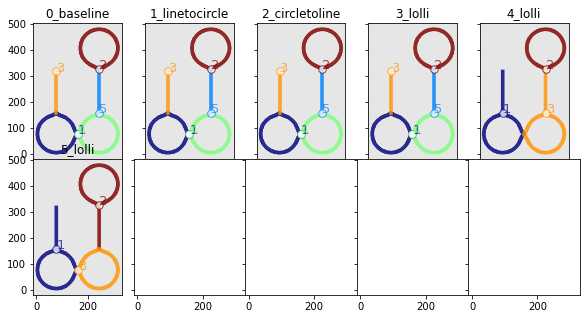

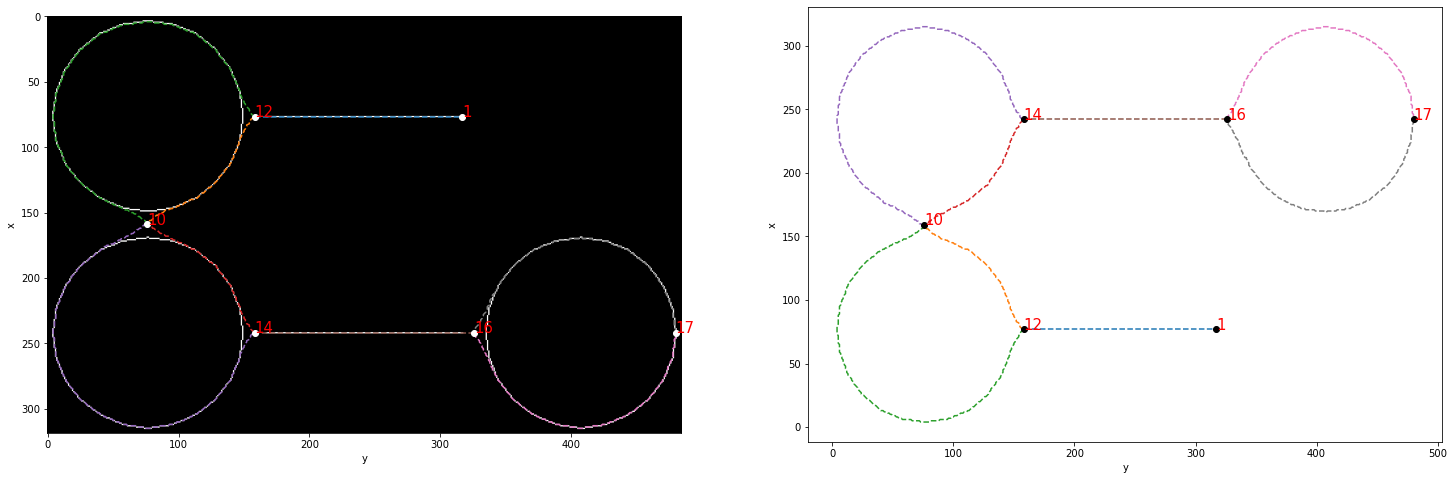

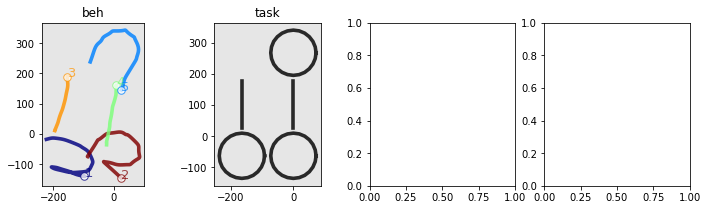

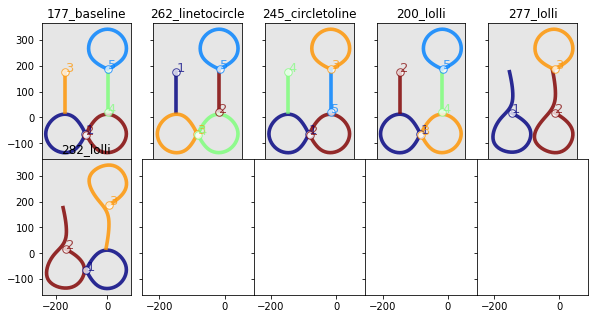

In [193]:

# Find trials for this task
list_indtrial = D.filterPandas({"unique_task_name":[taskname]})
print(list_indtrial)

# take the first
indtrial = list_indtrial[1]

# Print sumatr
print_summary_bestparses_alltrials(D)

# Plot base parses
plot_baseparses_all(D, indtrial)
                                
# Plot best perms
plot_and_print_perms_for_each_baseparse(D, indtrial)
                                

##### Reextract chunks, perms, and best-fit parses

In [177]:
# P = D.parser_get_parser_helper(indtrial)
# P.Parses[64]["perm_of_list"] = []
D.parser_extract_chunkparses(indtrial, None, False)

ENTERING NEW BASE PARSE:,  [0, 1, 2, 3, 4] [0, 1, 2, 3, 4] {0: False, 1: [False, False, False, False, False]} baseline
Added new BASE parse, ind: 0
ENTERING NEW BASE PARSE:,  [0, 1, 2, 3, 4] [[2, 4], [0, 1, 3]] {0: True, 1: [False, False]} linetocircle
Added new BASE parse, ind: 1
ENTERING NEW BASE PARSE:,  [0, 1, 2, 3, 4] [[0, 1, 3], [2, 4]] {0: True, 1: [False, False]} circletoline
Added new BASE parse, ind: 2
ENTERING NEW BASE PARSE:,  [0, 1, 2, 3, 4] [[0, 2], [1], [3, 4]] {0: False, 1: [False, False, False]} lolli
Added new BASE parse, ind: 3
ENTERING NEW BASE PARSE:,  [[0, 2], [1], [3, 4]] [0, 1, 2] {0: False, 1: [False, False, False]} lolli
Added new BASE parse, ind: 4
ENTERING NEW BASE PARSE:,  [[0, 2], [1, 4], [3]] [0, 1, 2] {0: False, 1: [False, False, False]} lolli
Added new BASE parse, ind: 5
*****HERERERER
177 []
expect to get (ignoreing num max): 120
Added new parse, ind: 177
Added self.Parses, perm of :  ('base', 0)
Added new parse, ind: 178
Added self.Parses, perm of :  

Added new parse, ind: 268
Added self.Parses, perm of :  ('base', 0)
Added new parse, ind: 269
Added self.Parses, perm of :  ('base', 0)
Added new parse, ind: 270
Added self.Parses, perm of :  ('base', 0)
Added new parse, ind: 271
Added self.Parses, perm of :  ('base', 0)
Added new parse, ind: 272
Added self.Parses, perm of :  ('base', 0)
*****HERERERER
0 baseline []
expect to get (ignoreing num max): 2
expect to get (ignoreing num max): 6
Updated self.Parses at ind 262  with new perm of :  ('base', 1)
Updated self.Parses at ind 30  with new perm of :  ('base', 1)
Updated self.Parses at ind 248  with new perm of :  ('base', 1)
Updated self.Parses at ind 28  with new perm of :  ('base', 1)
Updated self.Parses at ind 179  with new perm of :  ('base', 1)
Updated self.Parses at ind 197  with new perm of :  ('base', 1)
Updated self.Parses at ind 184  with new perm of :  ('base', 1)
Updated self.Parses at ind 196  with new perm of :  ('base', 1)
Updated self.Parses at ind 259  with new perm o